In [10]:
import os
os.listdir()

['.ipynb_checkpoints',
 'anaconda_projects',
 'Audit_Log_Insights.ipynb',
 'launch_jupyter.bat',
 'Simulated_Audit_Logs.csv',
 'state_street_audit_flow_100k..csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 'Untitled4.ipynb']

In [3]:
!pip install transformers
!pip install sentencepiece 

   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/992.0 kB ? eta -:--:--
   ------------------------------- -------- 786.4/992.0 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 992.0/992.0 kB 2.3 MB/s eta 0:00:00


In [4]:
from transformers import pipeline

# Load the lightweight summarization model
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

C:\Users\Bala\anaconda3\envs\ai_env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Bala\.cache\huggingface\hub\models--sshleifer--distilbart-cnn-12-6. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu


In [6]:
# Sample audit note (you can replace this later with real rows)
sample_text = "No DR activity since Dec 2024, non-compliant per policy. This violates our internal SLA and disaster recovery controls."

# Summarize using the LLM
summary = summarizer(sample_text, max_length=50, min_length=10, do_sample=False)

# Print the output
print("🧠 LLM Summary:", summary[0]['summary_text'])

Your max_length is set to 50, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


🧠 LLM Summary:  No DR activity since Dec 2024, non-compliant per policy . This violates our internal SLA and disaster recovery controls . This violation of our SLA, disaster recovery and SLA controls .


In [7]:
from transformers import pipeline
import pandas as pd

# Load model for summarization
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

Device set to use cpu


In [11]:
df = pd.read_csv('state_street_audit_flow_100k.csv')

# Preview
df[['Auditor_Note', 'L1 Audit_Finding', 'L2 Audit_Finding', 'L3 Audit Note']].head()

,Auditor_Note,L1 Audit_Finding,L2 Audit_Finding,L3 Audit Note
0,Control operating effectively.,False,False,NaN
1,"Detected issue in Tagging Delay Check, flagged...",True,True,Executive summary: Tagging Delay Check breach ...
2,"Detected issue in FX Exposure Review, flagged ...",True,False,NaN
3,Control operating effectively.,False,False,NaN
4,Control operating effectively.,False,False,NaN


In [12]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")

# Improved keyword extractor with phrase and pattern sensitivity
def enhanced_spacy_keywords(text):
    doc = nlp(text)
    keywords = set()

    # Noun chunks and named entities
    for chunk in doc.noun_chunks:
        phrase = chunk.text.strip().lower()
        if len(phrase.split()) <= 4:  # Short phrases
            keywords.add(phrase)

    # Capture numeric durations like "9+ months", "12 months", etc.
    duration_pattern = re.findall(r"\d+\+?\s*months?", text.lower())
    for match in duration_pattern:
        keywords.add(match.strip())

    # Add custom words (e.g., "breaches", "backdated", "non-actionable")
    keywords.update([token.lemma_ for token in doc if token.pos_ in ["NOUN", "ADJ"] and len(token.text) > 2])

    return list(sorted(keywords))

# Apply
df["spacy_keywords"] = df["Auditor_Note"].apply(enhanced_spacy_keywords)

In [13]:
from transformers import pipeline

# Load the summarization model
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

# Function to apply LLM summarization (with fallback length limits)
def summarize_text(text):
    try:
        return summarizer(text, max_length=30, min_length=5, do_sample=False)[0]['summary_text']
    except:
        return "Summary error"

# Apply to a smaller sample (start with 100 rows to evaluate)
df_sample = df.head(100)
df_sample["llm_summary"] = df_sample["Auditor_Note"].apply(summarize_text)

Device set to use cpu
Your max_length is set to 30, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 30, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 30, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 30, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_le

In [14]:
df_sample[["Auditor_Note", "llm_summary", "spacy_keywords"]].head(5)

,Auditor_Note,llm_summary,spacy_keywords
0,Control operating effectively.,Control operating effectively. Control operat...,[control]
1,"Detected issue in Tagging Delay Check, flagged...","Detected issue in Tagging Delay Check, flagge...","[analysis, detected, detected issue, further, ..."
2,"Detected issue in FX Exposure Review, flagged ...",Detected issue in FX Exposure Review flagged ...,"[analysis, detected, detected issue, further, ..."
3,Control operating effectively.,Control operating effectively. Control operat...,[control]
4,Control operating effectively.,Control operating effectively. Control operat...,[control]


In [15]:
from transformers import pipeline

summarizer = pipeline("summarization", model="google/pegasus-xsum")

def clean_summary(text):
    summary = summarizer(text, max_length=30, min_length=5, do_sample=False)[0]["summary_text"]
    # Remove exact repetition
    parts = list(dict.fromkeys(summary.split('. ')))  # remove repeated sentences
    return '. '.join(parts).strip()

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

C:\Users\Bala\anaconda3\envs\ai_env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Bala\.cache\huggingface\hub\models--google--pegasus-xsum. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
rom tqdm import tqdm

# If you're using apply
tqdm.pandas()
df_sample["llm_summary"] = df_sample["Auditor_Note"].progress_apply(clean_summary)

In [ ]:
incomplete = df_sample["llm_summary"].isna().sum()
print(f"Incomplete summaries: {incomplete} out of {len(df_sample)}")

In [ ]:
df_sample[df_sample["llm_summary"].str.strip() == ""]

In [ ]:
print(df_sample[["Auditor_Note", "llm_summary"]].tail(5))

In [ ]:
import time

start = time.time()
df_sample["llm_summary"] = df_sample["Auditor_Note"].progress_apply(clean_summary)
end = time.time()

print("LLM summarization completed in {(end - start):.2f} seconds.")

In [16]:
pd.set_option("display.max_colwidth", None)  # Show full text
df_sample[["Auditor_Note", "llm_summary", "spacy_keywords"]].head(10)

,Auditor_Note,llm_summary,spacy_keywords
0,Control operating effectively.,Control operating effectively. Control operating well. Control working effectively.,[control]
1,"Detected issue in Tagging Delay Check, flagged for further analysis.","Detected issue in Tagging Delay Check, flagged for further analysis .","[analysis, detected, detected issue, further, further analysis, issue, tagging delay check]"
2,"Detected issue in FX Exposure Review, flagged for further analysis.",Detected issue in FX Exposure Review flagged for further analysis . Detected issue flagged up in FX exposure Review .,"[analysis, detected, detected issue, further, further analysis, fx exposure review, issue]"
3,Control operating effectively.,Control operating effectively. Control operating well. Control working effectively.,[control]
4,Control operating effectively.,Control operating effectively. Control operating well. Control working effectively.,[control]
5,Control operating effectively.,Control operating effectively. Control operating well. Control working effectively.,[control]
6,Control operating effectively.,Control operating effectively. Control operating well. Control working effectively.,[control]
7,"Detected issue in Non-Actionable Alerts Review, flagged for further analysis.","Detected issue in Non-Actionable Alerts Review, flagged for further analysis .","[analysis, detected, detected issue, further, further analysis, issue, non-actionable alerts review]"
8,Control operating effectively.,Control operating effectively. Control operating well. Control working effectively.,[control]
9,"Detected issue in DR Activity, flagged for further analysis.","Detected issue in DR Activity, flagged for further analysis .","[analysis, detected, detected issue, dr activity, further, further analysis, issue]"


In [17]:
df_sample.to_csv("audit_summary_comparison.csv", index=False)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
df = pd.read_csv("audit_summary_comparison.csv")
df = df[['Auditor_Note', 'llm_summary', 'spacy_keywords']]
df.dropna(inplace=True)
df.head()

,Auditor_Note,llm_summary,spacy_keywords
0,Control operating effectively.,Control operating effectively. Control operating well. Control working effectively.,['control']
1,"Detected issue in Tagging Delay Check, flagged for further analysis.","Detected issue in Tagging Delay Check, flagged for further analysis .","['analysis', 'detected', 'detected issue', 'further', 'further analysis', 'issue', 'tagging delay check']"
2,"Detected issue in FX Exposure Review, flagged for further analysis.",Detected issue in FX Exposure Review flagged for further analysis . Detected issue flagged up in FX exposure Review .,"['analysis', 'detected', 'detected issue', 'further', 'further analysis', 'fx exposure review', 'issue']"
3,Control operating effectively.,Control operating effectively. Control operating well. Control working effectively.,['control']
4,Control operating effectively.,Control operating effectively. Control operating well. Control working effectively.,['control']


In [20]:
# Function to compute cosine similarity between two strings
def compute_cosine_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf[0:1], tfidf[1:2])[0][0]

# Apply row-wise similarity calculations
df['sim_llm'] = df.apply(lambda row: compute_cosine_similarity(str(row['Auditor_Note']), str(row['llm_summary'])), axis=1)
df['sim_spacy'] = df.apply(lambda row: compute_cosine_similarity(str(row['Auditor_Note']), str(row['spacy_keywords'])), axis=1)

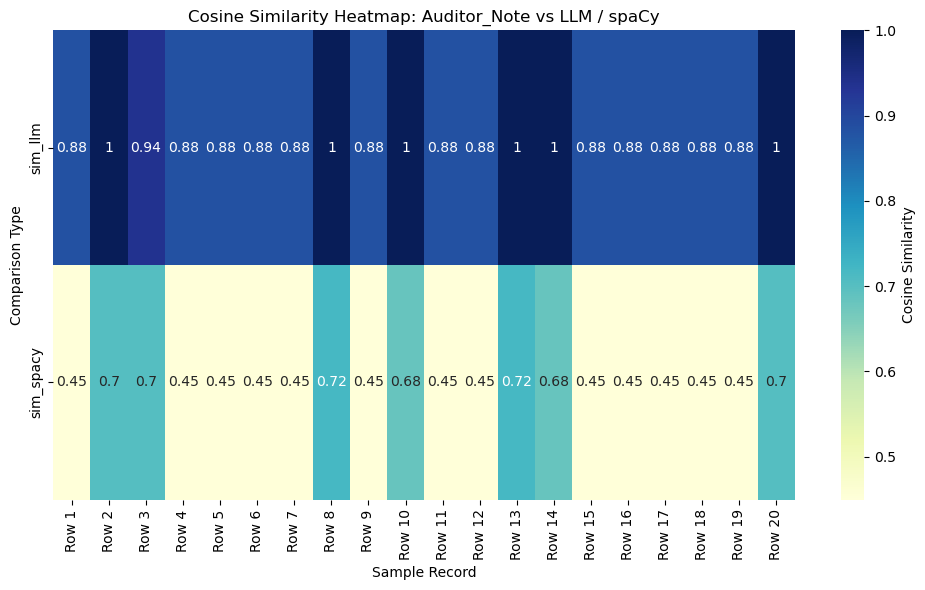

In [21]:
# Take sample
sample_df = df[['sim_llm', 'sim_spacy']].head(20)

# Set index for clearer heatmap display
sample_df.index = [f"Row {i}" for i in range(1, 21)]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sample_df.T, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Cosine Similarity'})
plt.title("Cosine Similarity Heatmap: Auditor_Note vs LLM / spaCy")
plt.xlabel("Sample Record")
plt.ylabel("Comparison Type")
plt.tight_layout()
plt.savefig("heatmap_audit_similarity.png", dpi=300)
plt.show()

In [22]:
df.to_csv("audit_similarity_enriched.csv", index=False)